<a href="https://colab.research.google.com/github/Tapomay1/Bike-Sharing-Demand-Prediction/blob/main/TPS_Bike_Sharing_Demand_Predictionn_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Bike Sharing Demand Prediction**

#####**Project Type** - Regression
#####**Contribution** - Team
##### **Team Member - 1** - TAPOMAY SAHOO
##### **Team Member - 2** - SHIVAM TIWARI

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

The dataset is of Seoul's public bike rental service called "Ttareungi," also known as Seoul Bike. It has become one of the capital city's most popular public transport systems by being used more than 100 million times since the service was launched in December 2015, as reported in early 2022. The popularity however has posed the challenge of keeping the bikes available as and when the demand for them rises. 

So our goal is to identify the variables that have a say in the demand of the bikes and then build a model that helps predict the demands as and when the climatic conditions change.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Begin !***

## ***1. Know Your Data***

###Import Libraries

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [ ]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

In [72]:
# Loading the dataset
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module_04/Capstone Project_ML_01/SeoulBikeData.csv',encoding='latin1')

# ***2. Understand More About The Data***

### Dataset Overview


In [73]:
# Viewing the data of top 5 rows to take a glimps of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [74]:
# View the data of bottom 5 rows to take a glimps of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [75]:
#Getting the shape of dataset with rows and columns
bike_df.shape

(8760, 14)

In [76]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [77]:
# Dataset info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [78]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### What do we know now about the dataset?



* ***This Dataset contains 8760 lines and 14 columns.*** 
***In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*** 

We have 8760 datapoints, 13 independent variables and one dependent variable, Rented Bike Count.

9 variables are numeric. Only four of the 14 are object datatypes.

###Variables Description

**Date :** Date of the rental agreement

**Rented Bike Count :** Number of bikes rented

**Hour :** Hour of the day

**Temperature(°C) :** Temperature 

**Humidity(%) :** Humidity measure

**Wind speed(m/s) :** Wind speed

**Visibility (10m) :** Visibility measure

**Dew point temperature(°C)	:** Dew point temperature measure

**Solar Radiation (MJ/m2)	:** Solar Radiation measure

**Rainfall(mm) :** Rainfall in mm

**Snowfall(cm) :** Snowfall measure

**Seasons :** Season

**Holiday :** Whether a holiday or not

**Functioning Day :** Whether a functional day or not

### Checking number of uniques

In [79]:
# Check unique values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


# ***Preprocessing the dataset***

##Missing values

In [80]:
#check for count of missing values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

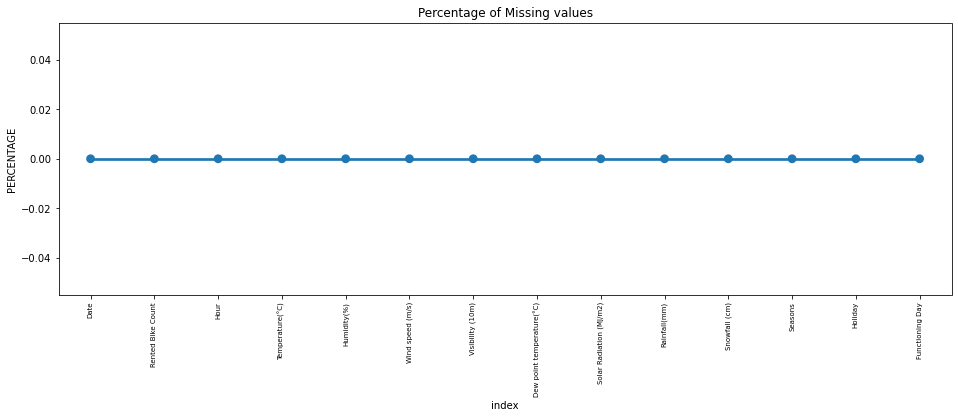

In [81]:
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

In [82]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

##Changing column name

* ***Some of  the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.***

In [84]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Breaking date column

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***





# 3. ***Data Wrangling***

In [86]:
bike_df.Date = pd.to_datetime(bike_df.Date,dayfirst=True)

In [87]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [88]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [89]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [90]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [23]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

##Changing data type

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

In [91]:
bike_df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [92]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [93]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [94]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [95]:
bike_df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

## ***4. EDA (Understanding the relationships between variables using different kinds of visualisation techniques:)***


####4.1 How are the numerical variables correlated?

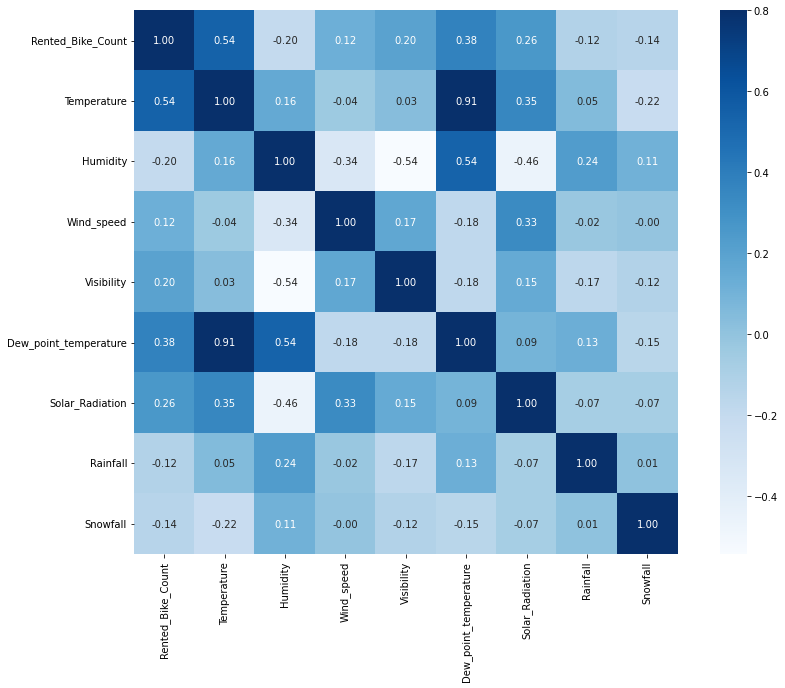

In [96]:
# Heatmap
corrmat = bike_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt='.2f',annot_kws={'size':10},vmax=.8,square=True,cmap="Blues");

We chose heatmap to display the relationship between the numerical variables. It is important to understand what all variables have what kind of says in deciding the number of bikes that will be rented on a particular hour of a day. And to visualise something like that, heatmaps are the best way.

From the heatmap, we understand that there is a strong positive correlation between temperature and due temperature. 

Moderate positive correlation exists between temperature and rented bike count, dew point temperature and rented bike count, hour and rented bike count, humidity and dew point temperature, solar radiation and wind speed, and solar radiation and temperature.

Moderate negative correlation exists between wind speed and humidity, visibility and humidity, and humidity and solar radiation.

Understanding what affects the number of bikes rented on a given hour will help predict the requirements early and thus make the bikes available and lessen the wait time.

####4.2 What is the distribution of the target variable Rented Bike Count?

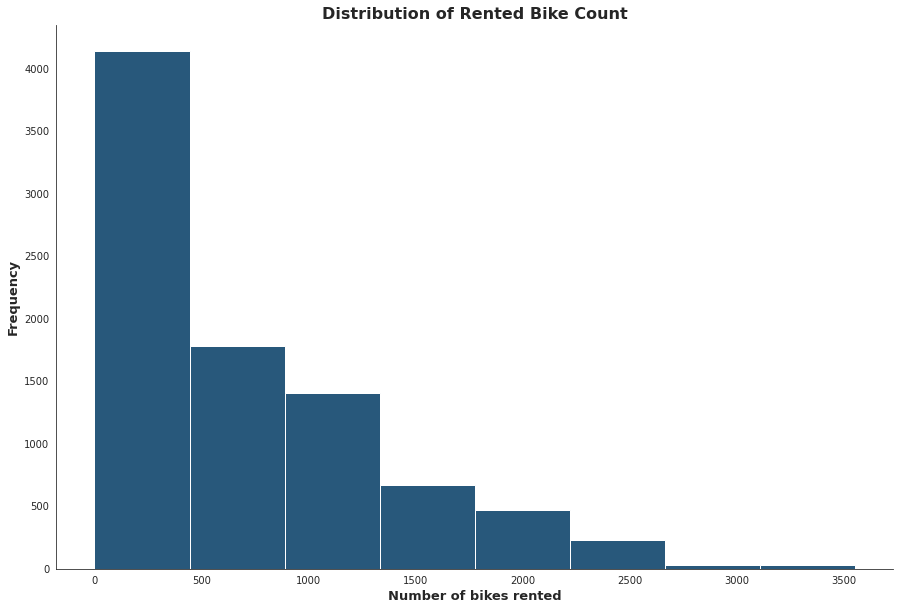

In [98]:
# Histogram plot
sns.set_style('white')
plt.figure(figsize = (15,10))
plt.hist(bike_df['Rented_Bike_Count'],
         bins = 8,
         color = '#28587B')
plt.title('Distribution of Rented Bike Count', fontsize = 16, weight = "bold")
plt.xlabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [99]:
# Calculating the skewness of the Rented Bike Count variable
bike_df['Rented_Bike_Count'].skew()

1.1534281773679014

We plotted the histogram to see how our target variable is distributed. A histogram tells us about the skewness and the distribution of a variable.

The Rented Bike Count variable is highly positively skewed. It measures 1.15 for skewness in the positive direction.

It is fairly expected that the distribution of the dataset will be somewhat like it is i.e. a lot of volume for the smaller numbers and the volume keeps on decreasing as and when we move towards higher numbers.

####4.3 What is the distribution of the count of bikes rented vs months?

In [101]:
# Preparing the data
bar_data = bike_df.groupby('month').agg({'Rented_Bike_Count':'sum'}).reset_index()
bar_data

,month,Rented_Bike_Count
0,1,150006
1,2,151833
2,3,380594
3,4,524227
4,5,707088
5,6,896887
6,7,734460
7,8,651887
8,9,673612
9,10,650675


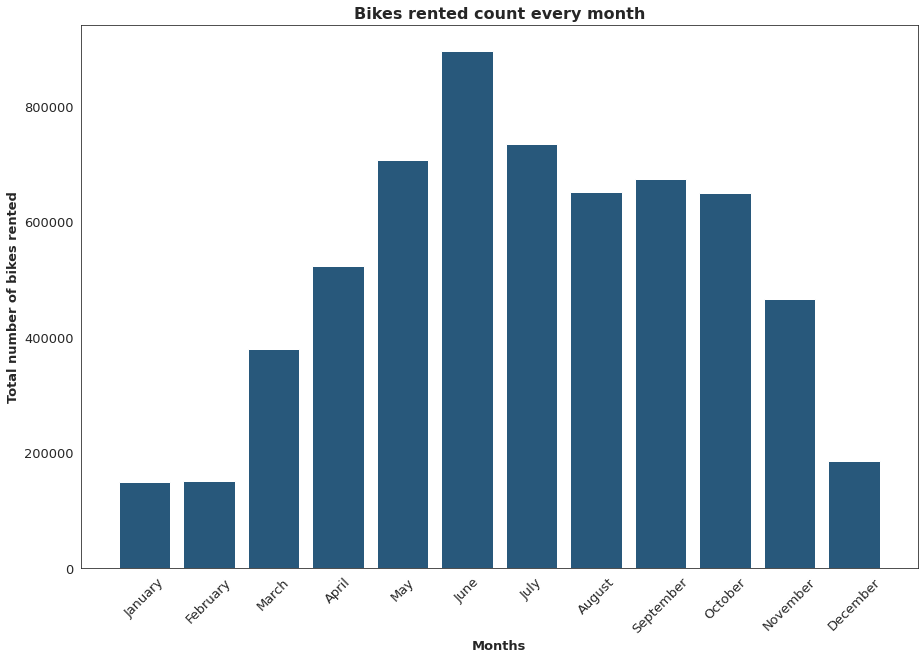

In [102]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['month'], 
        height = bar_data['Rented_Bike_Count'],
        color = '#28587B')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks = bar_data['month'], labels = months, rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Bikes rented count every month', fontsize = 16, fontweight = 'bold')
plt.xlabel('Months', fontsize = 13, fontweight = 'bold')
plt.ylabel('Total number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

Bar graphs are the most easiest way to represent a categorical and a numerical variable together. And they are quiet easy to interpret as well.

We can see that the months in the middle of the year have high bike rentals whereas they are far lesser at the beginning and at the end of the year.

June has the highest bike rentals of all the months.

####4.4 Distribution of the Rented Bike Count over days

In [103]:
# Preparing the data 
line_data = bike_df.groupby('Date').agg({'Rented_Bike_Count':'sum'}).reset_index()
line_data

KeyError: ignored

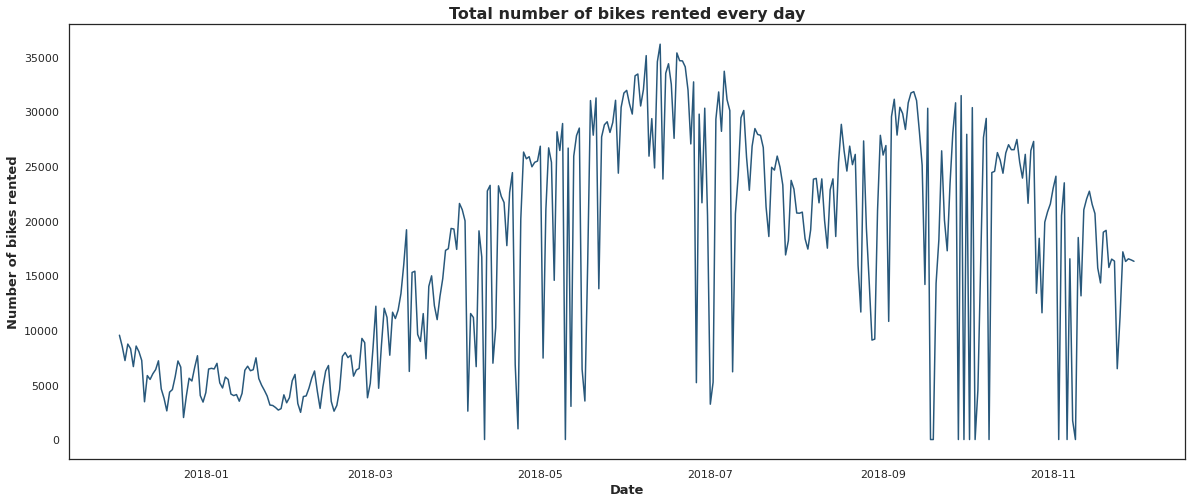

In [ ]:
# Plotting the line graph
plt.figure(figsize = (20,8))
plt.plot(line_data['Date'], line_data['Rented Bike Count'], color = '#28587B')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Date', fontsize = 13, fontweight = 'bold')
plt.title('Total number of bikes rented every day', fontsize = 16, fontweight = "bold")
plt.show();

Line plots help understand the trends over time, like how we have in the case of the number of bikes rented over the 365 days of the year.

It looks like the first two months saw a bit of dip in the number of bikes rented before we saw a consistent growth which peaked in the month of June before the drop until August. Since August, there was again a growth until October after which it started going down again.

Also, the months of April, May, July, September, October and November experienced inconsistency in the number of the bikes rented on a day-to-day basis when compared with the rest of the months.

Knowing it explains which months experience more inconsistency and which doesn't and which ones have more demands and which don't. All these help get more information on the requirements of users.

####4.5 Which day of the week generally has more bikes rented?

In [ ]:
# Preparing the data
# Finding out total number of bikes rented every day of the year
temp = df.groupby('Date').agg({'Day':'max','Rented Bike Count':'sum'}).reset_index() 
# Grouping by the day of the week and finding median
bar_data = temp.groupby('Day').agg({'Rented Bike Count':'median'}).reset_index() 
bar_data

,Day,Rented Bike Count
0,0,19126.5
1,1,17911.5
2,2,19587.5
3,3,17590.0
4,4,18266.0
5,5,18380.5
6,6,14248.5


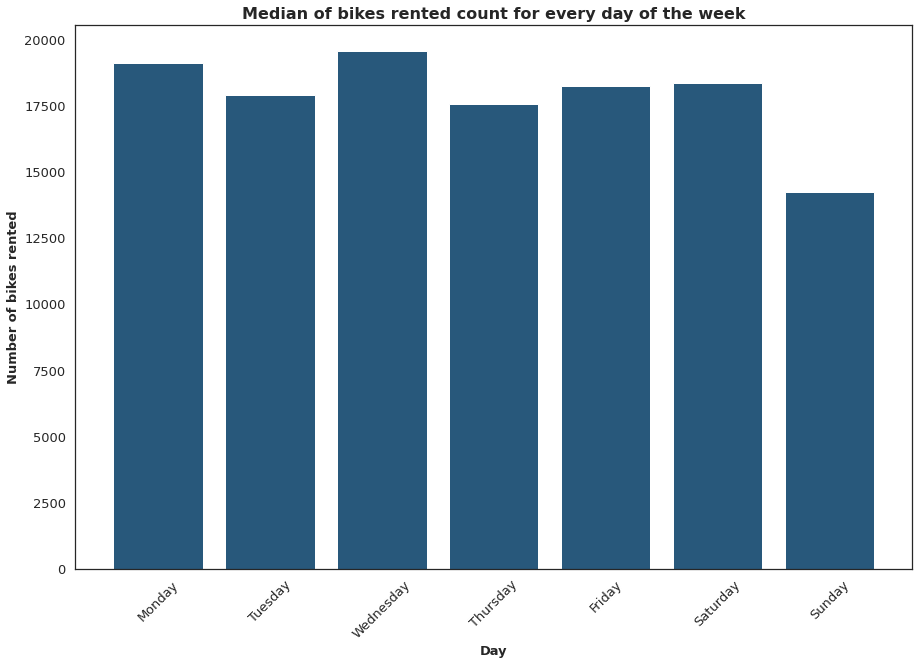

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Day'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
dayoftheweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks = bar_data['Day'], labels = dayoftheweek, rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Median of bikes rented count for every day of the week', fontsize = 16, fontweight = 'bold')
plt.xlabel('Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

Bar graph here helps us the most because they are easy to understand. 

Mondays and Wednesdays are the busiest whereas Sunday has the least requirement.

####4.6 When is the demand highest for bikes in terms of hour of the day?

In [ ]:
# Preparing the data
bar_data = df.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
bar_data

,Hour,Rented Bike Count
0,0,513.0
1,1,401.0
2,2,265.0
3,3,176.0
4,4,119.0
5,5,129.0
6,6,232.0
7,7,426.0
8,8,728.0
9,9,680.0


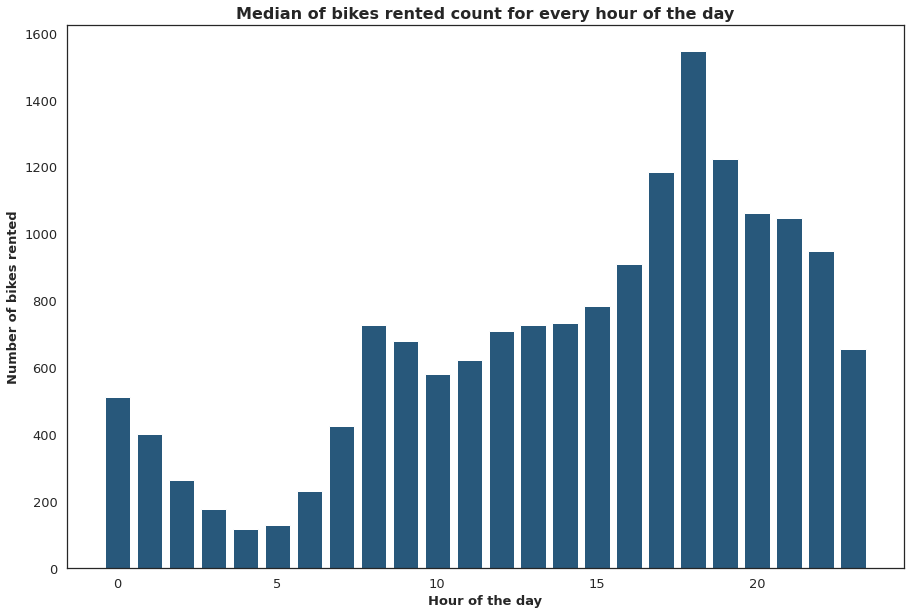

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Hour'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Median of bikes rented count for every hour of the day', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hour of the day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

The early morning hours have the lowest demands. However, after 07:00 hour, the demand grows and stays the same until 15:00 hour. Post 15:00, the demand grows at a rapid rate and see some of the busiest hours (16:00-22:00).

####4.7 How does the seasons affected the bike rental counts?

In [ ]:
# Distribution of seasons among the months
df.groupby('Month').agg({'Seasons':'unique'})

,Seasons
Month,
1,[Winter]
2,[Winter]
3,[Spring]
4,[Spring]
5,[Spring]
6,[Summer]
7,[Summer]
8,[Summer]
9,[Autumn]


In [ ]:
# Preparing the data
temp = df.groupby(['Seasons','Date']).agg({'Rented Bike Count':'sum'}).reset_index() # Grouping by Seasons and Date 
bar_data = temp.groupby('Seasons').agg({'Rented Bike Count':'median'}).reset_index() # Grouping by Seasons
bar_data

,Seasons,Rented Bike Count
0,Autumn,21545.0
1,Spring,17419.0
2,Summer,25571.5
3,Winter,5498.0


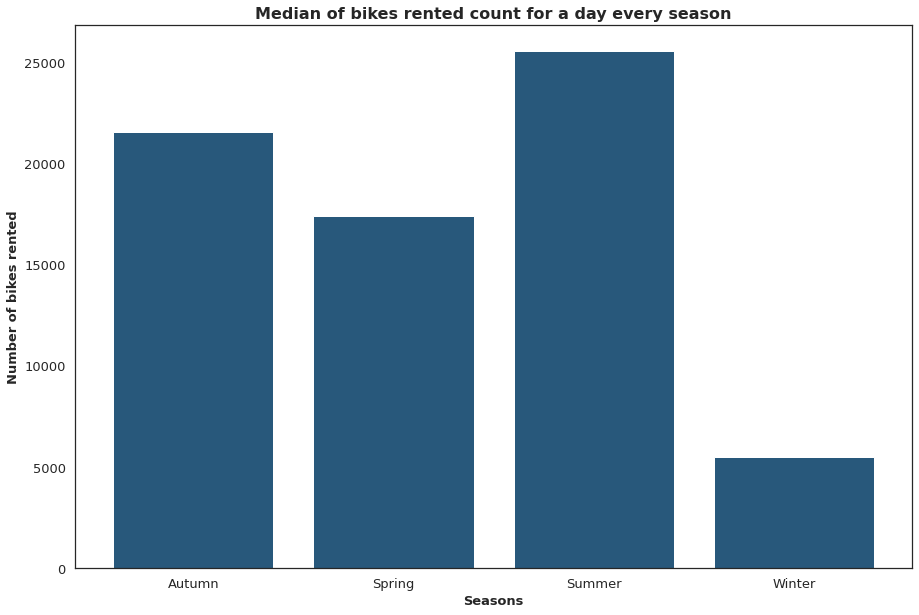

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Seasons'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Median of bikes rented count for a day every season', fontsize = 16, fontweight = 'bold')
plt.xlabel('Seasons', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

Winter starts from December and goes on till February. Then comes the season of Spring. It is spread from the month of March till May. After Spring is the season of Summer. Summer is between the months of June and August. Finally, the months of September, October and November have the season of Autumn.

Winter has very low requirements of bike sharing. Whereas, Summer has the highest. 

####4.8 How does the bike rental counts vary based on Holiday?

In [ ]:
# Preparing the data
temp = df.groupby('Date')['Holiday'].max().reset_index()
pie_data = temp.Holiday.value_counts(normalize=True).reset_index()
pie_data

,index,Holiday
0,No Holiday,0.950685
1,Holiday,0.049315


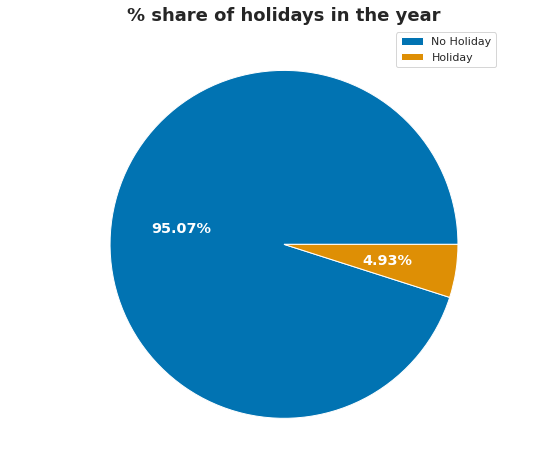

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Holiday'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of holidays in the year", fontweight = "bold", fontsize = 18)
plt.show();

In [ ]:
# Preparing the data
# Segregating the two kinds
df_holiday = df[df['Holiday']=='Holiday']
df_NH = df[df['Holiday']=='No Holiday']
# Grouping by Hour for them
line_data = df_holiday.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp = df_NH.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=line_data, right=temp, on='Hour')
line_data.columns = ['Hour', 'Holiday', 'No Holiday']
line_data

,Hour,Holiday,No Holiday
0,0,236.0,515.0
1,1,250.5,401.0
2,2,188.0,268.0
3,3,134.0,178.0
4,4,75.5,120.0
5,5,68.5,133.0
6,6,89.5,239.0
7,7,143.0,443.0
8,8,222.0,780.0
9,9,229.0,716.0


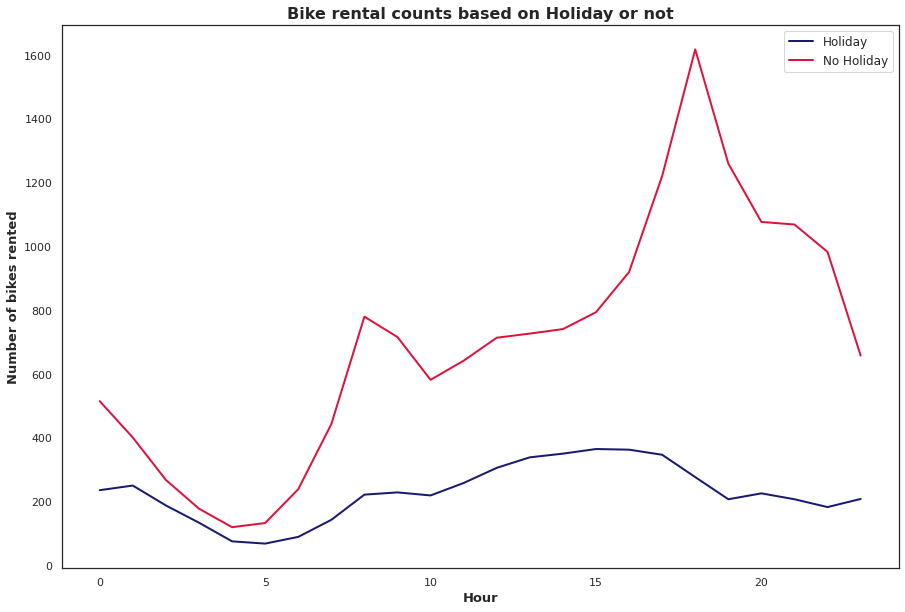

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Holiday'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Holiday'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Holiday','No Holiday']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Holiday or not', fontsize = 16, fontweight = "bold")
plt.show();

Pie charts are the best alternatives for bar graphs to show the distribution of a categorical variable in a dataset. 

And line plots help understand two numerical variables against a categorical variable in a clear and precise manner. Bar charts here would have been messy given the number of hours in a day (24) and stack charts would also have been difficult to understand the values and/or the distribution.

The dataset has 365 days of data, a year. And from the 365 days, only 18 days (4.93%) were holidays.

When it is a holiday, the bike rentals are very low, even during the supposed peak hours of the day during evening and night. 


####4.9 How many days were functional in the 365 days?

In [ ]:
# Preparing the data
temp = df.groupby('Date')['Functioning Day'].max().reset_index()
pie_data = temp['Functioning Day'].value_counts(normalize=True).reset_index()
pie_data

,index,Functioning Day
0,Yes,0.967123
1,No,0.032877


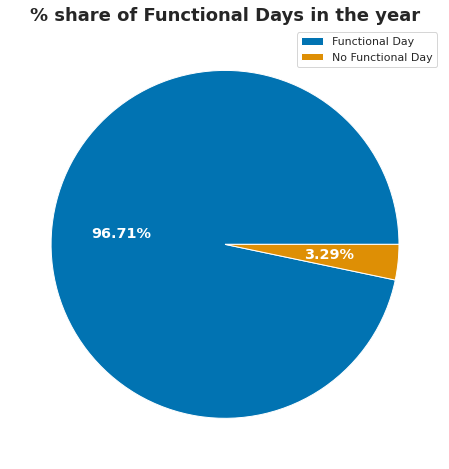

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Functioning Day'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend(labels = ['Functional Day', 'No Functional Day'])
# Giving our chart a suitable title
plt.title("% share of Functional Days in the year", fontweight = "bold", fontsize = 18)
plt.show();

There were 353 functional days (96.71%) in the 365 days of the dataset. Functional days are when the bike sharing and rental options are available.

####4.10 How does snowfall affect the bike rental count?

In [ ]:
# Preparing the data
# Segregating the two kinds
snow_data = df[df['Snowfall (cm)']>0]
non_snow = df[df['Snowfall (cm)']==0]
# Grouping by Hour for them
temp = snow_data.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp1 = non_snow.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=temp, right=temp1, on='Hour')
line_data.columns = ['Hour', 'Snow', 'No Snow']
line_data

,Hour,Snow,No Snow
0,0,100.0,544.5
1,1,120.0,421.5
2,2,75.0,283.0
3,3,55.0,186.5
4,4,37.0,126.5
5,5,41.5,140.0
6,6,76.5,255.0
7,7,165.0,464.0
8,8,375.5,786.0
9,9,206.5,725.0


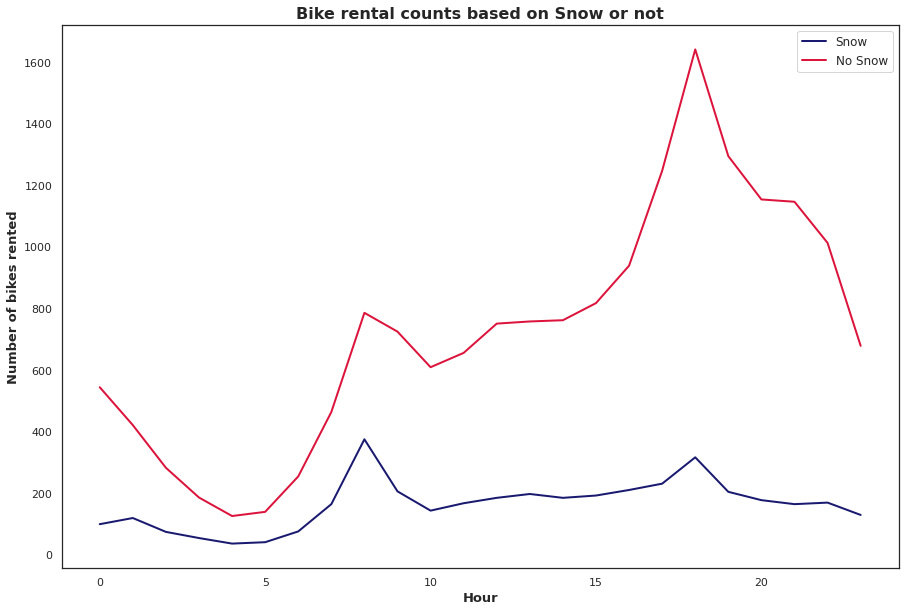

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Snow'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Snow'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Snow','No Snow']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Snow or not', fontsize = 16, fontweight = "bold")
plt.show();

The patterns of the bike rental counts when it snows is somewhat similar to the one when it doesn't, without the massive growth experienced post noon. When it snows, the bike rentals stay somewhat close to 200 every hour.

####4.11 How does rainfall affect the bike rental count?

In [ ]:
# Preparing the data
# Segregating the two kinds
rain_data = df[df['Rainfall(mm)']>0]
non_rain = df[df['Rainfall(mm)']==0]
# Grouping by Hour for them
temp = rain_data.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp1 = non_rain.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=temp, right=temp1, on='Hour')
line_data.columns = ['Hour', 'Rain', 'No Rain']
line_data

,Hour,Rain,No Rain
0,0,76.0,558.0
1,1,130.0,420.0
2,2,76.0,283.0
3,3,60.0,199.5
4,4,36.5,124.0
5,5,49.5,137.0
6,6,46.0,261.0
7,7,94.0,447.0
8,8,169.5,783.0
9,9,65.5,757.0


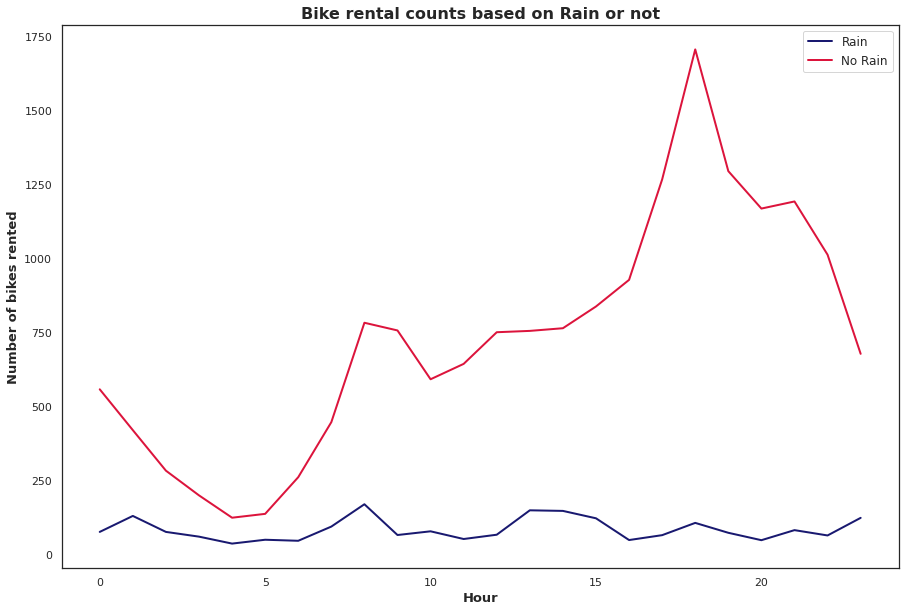

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Rain'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Rain'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Rain','No Rain']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Rain or not', fontsize = 16, fontweight = "bold")
plt.show();

Rainfall seems to have the most say on the bike rental counts. When it rains, the bike rental counts stay below 200 through the 24-hour cycle.

####4.12 How does solar radiation affect the bike rental counts?

In [ ]:
# Preparing the data
# Segregating the two kinds
solar_data = df[df['Solar Radiation (MJ/m2)']>0]
non_solar = df[df['Solar Radiation (MJ/m2)']==0]
# Grouping by Hour for them
temp = solar_data.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp1 = non_solar.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=temp, right=temp1, on='Hour')
line_data.columns = ['Hour', 'Solar Radiation', 'No Solar Radiation']
line_data

,Hour,Solar Radiation,No Solar Radiation
0,6,548.0,159.0
1,7,781.0,264.5
2,8,934.0,404.5
3,9,691.0,31.0
4,10,582.0,40.5
5,11,629.5,334.0
6,12,714.0,294.0
7,13,727.0,325.0
8,14,736.5,334.0
9,15,785.0,246.5


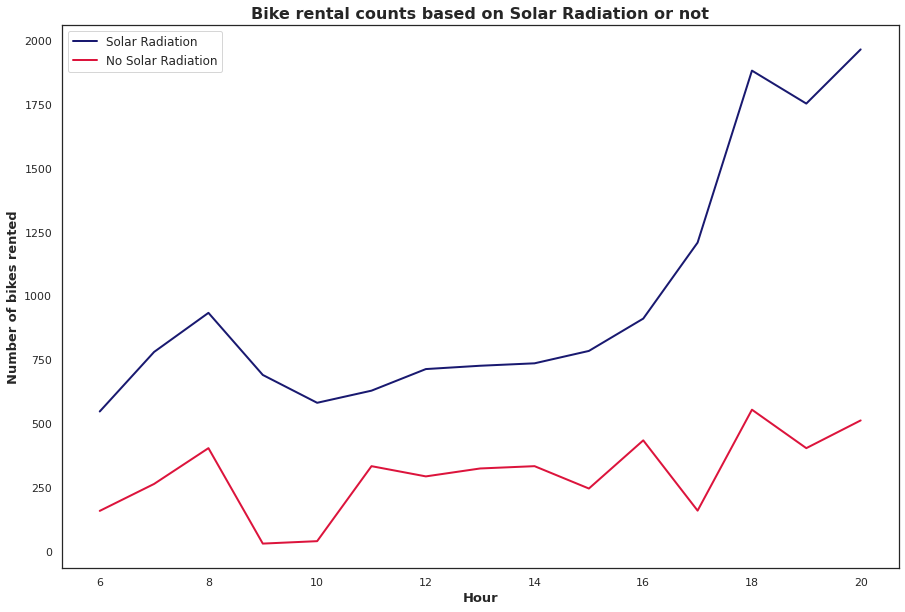

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Solar Radiation'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Solar Radiation'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Solar Radiation','No Solar Radiation']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Solar Radiation or not', fontsize = 16, fontweight = "bold")
plt.show();

Solar Radiation is experienced only post 06:00 hour and before 20:00 hour. And it forces the bike rental counts to be below 500 throughout the day.

####4.13 Understanding the distributions and plotting to see correlation.

In [ ]:
# Getting the numeric features for inspecting distributions
numeric_features = df.describe().columns

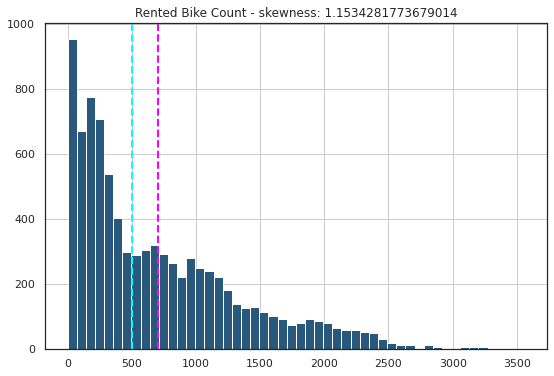

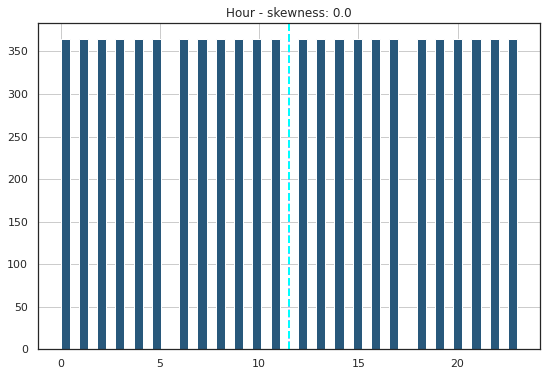

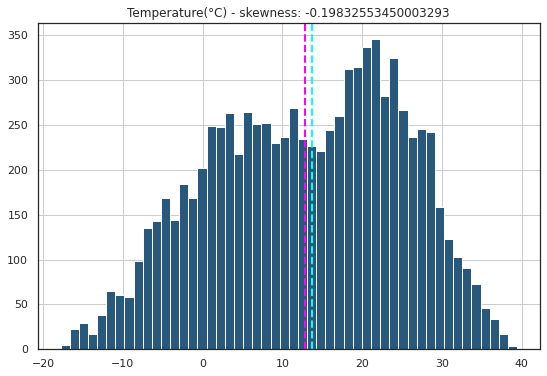

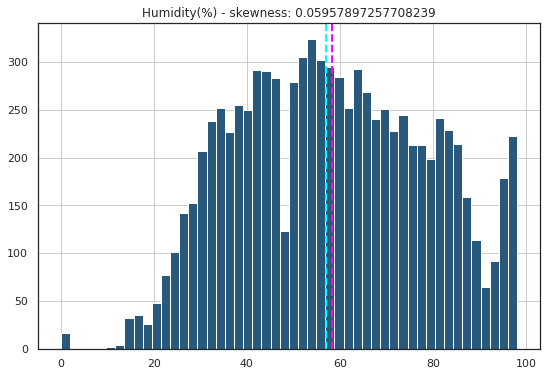

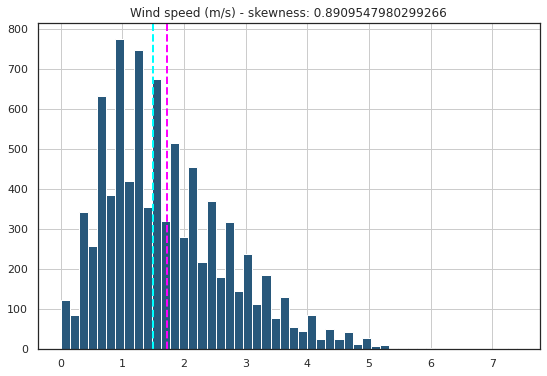

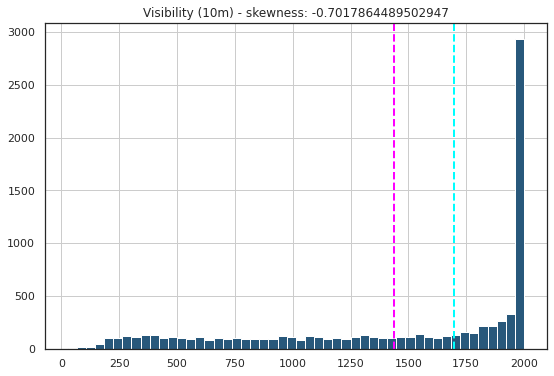

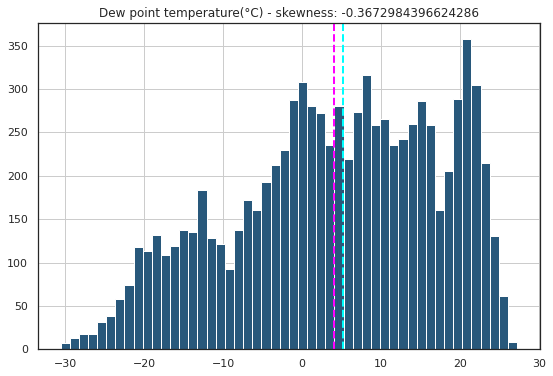

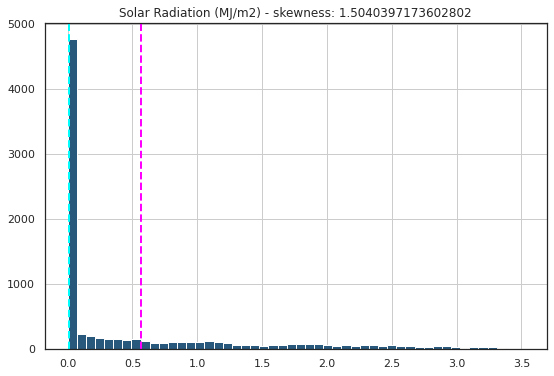

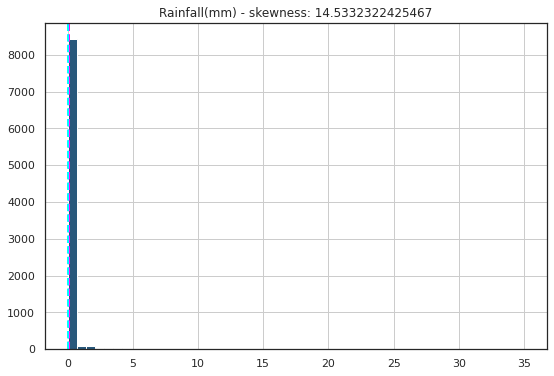

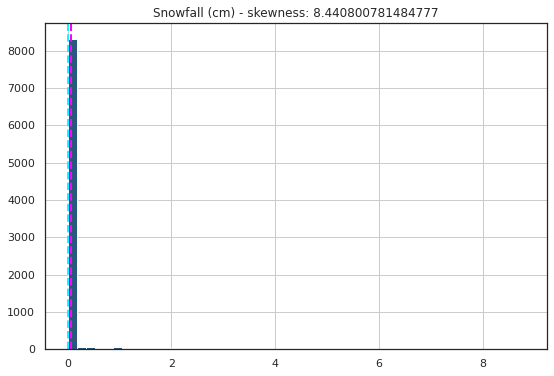

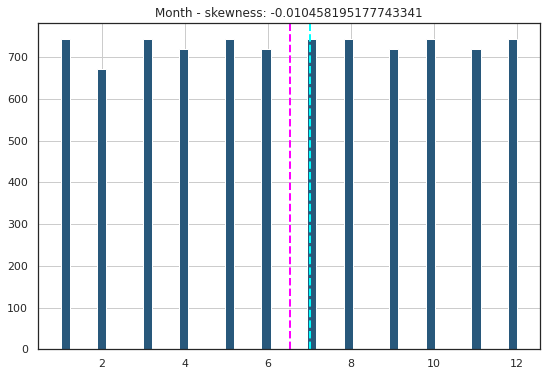

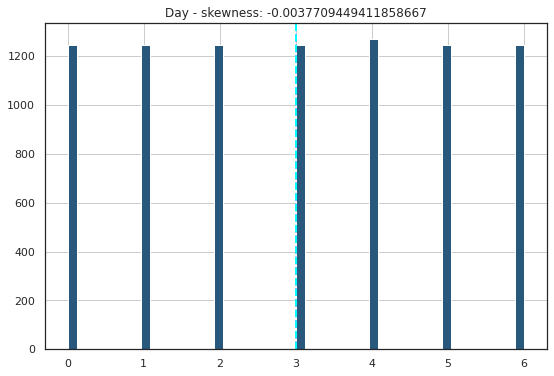

In [ ]:
# plot a bar plot for each numerical feature count
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax, color = '#28587B')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col + ' - skewness: ' + str(df[col].skew()))
plt.show();

As discussed earlier, Bike rental count is a highly positively skewed target variable. Snowfall, rainfall and solar radiation are also highly positively skewed.

Temperature, humidity and dew point temperature are fairly symmetrical in shape.

Windspeed is moderately positively skewed whereas, visibility is moderatelt negatively skewed.

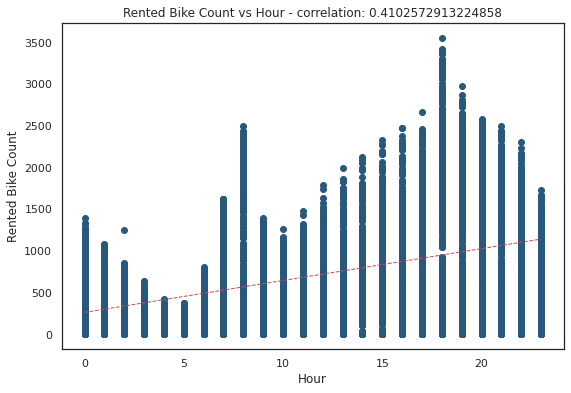

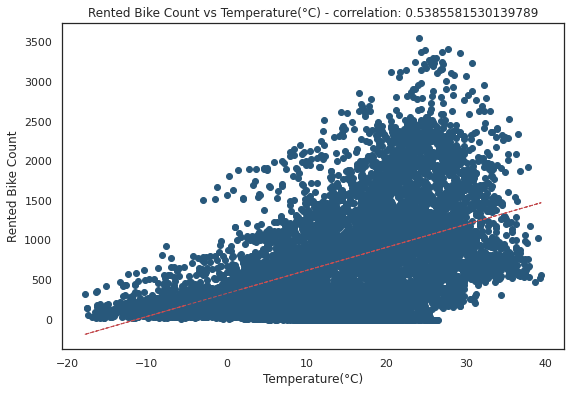

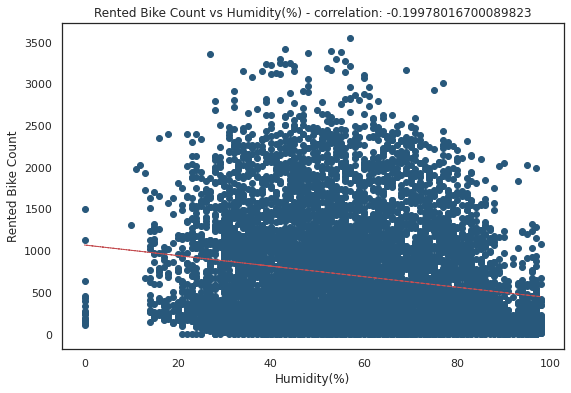

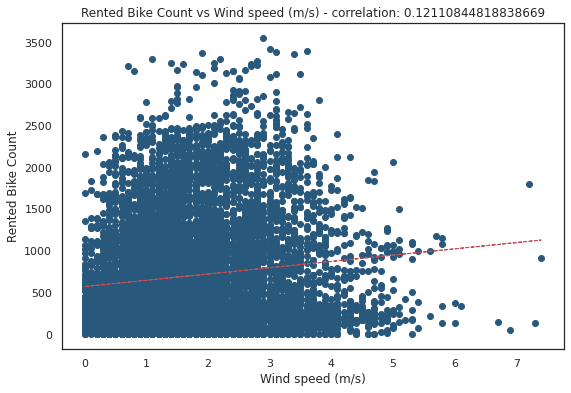

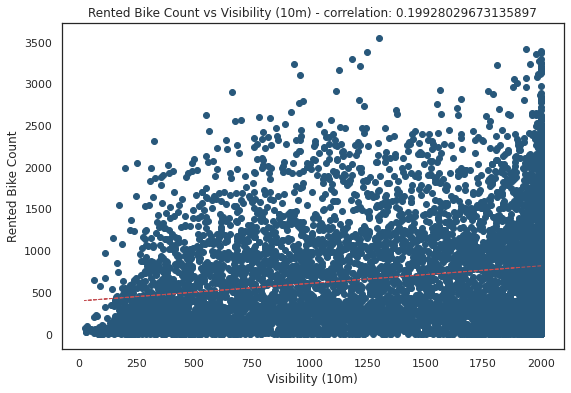

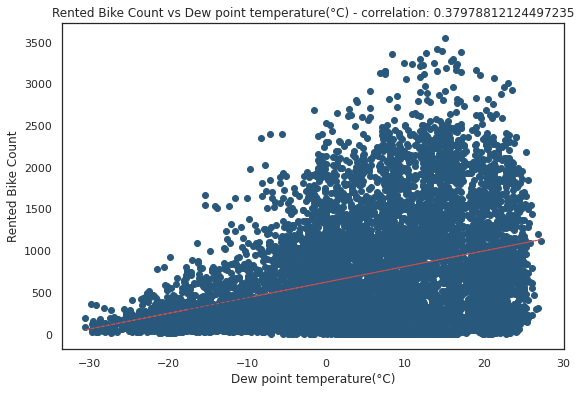

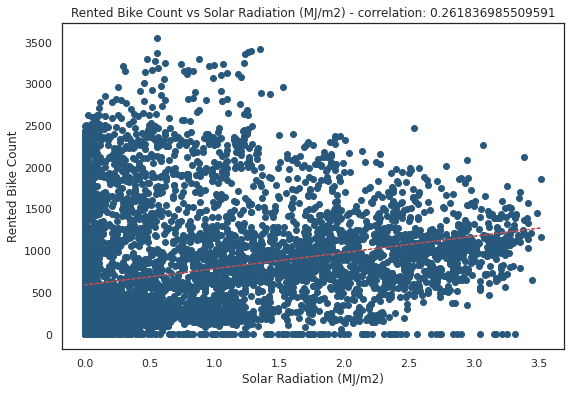

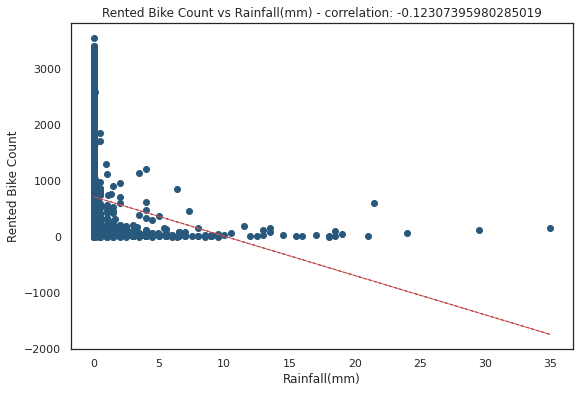

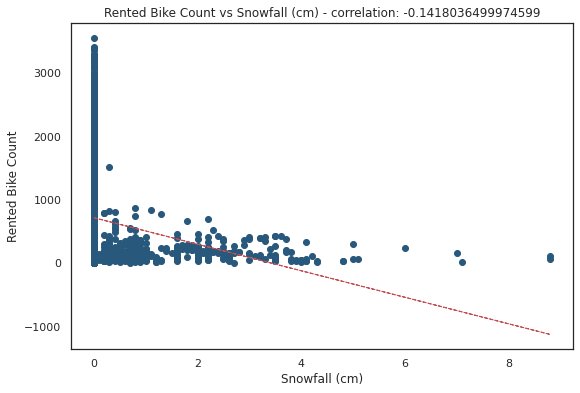

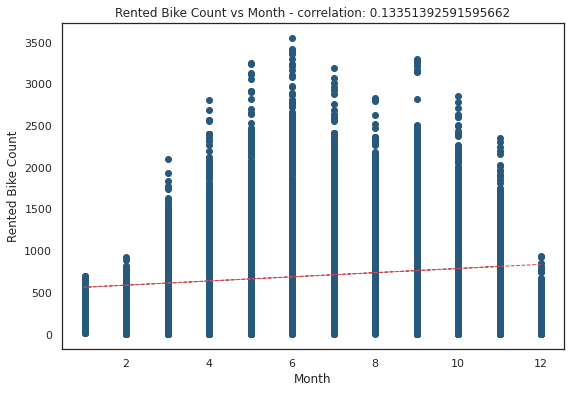

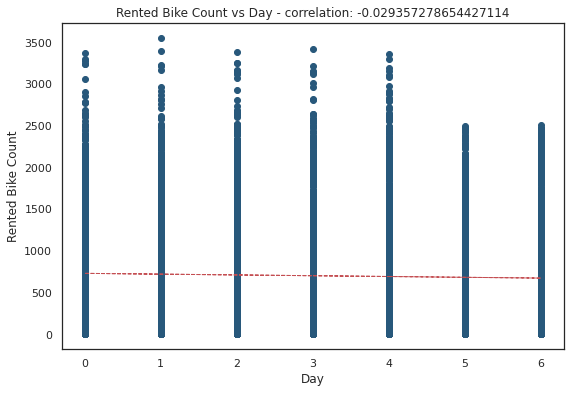

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='#28587B')
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + ' - correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show();

On plotting the scatter plots, none of the numeric variables show any kind of linear relationship with the target variable Rented Bike Count.

##**Analyze of Numerical variables**

#### Analyze of Numerical variables distplots

In [104]:
#assign the numerical coulmn to variavle
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

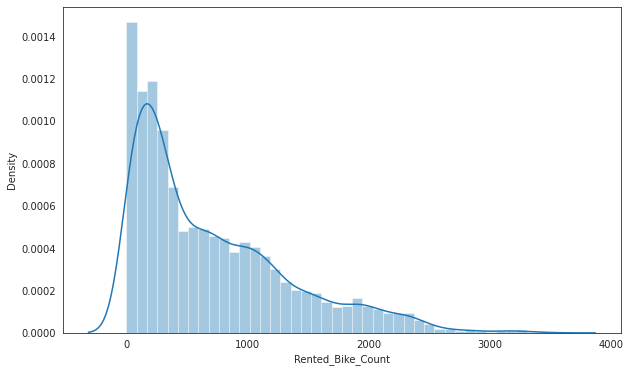

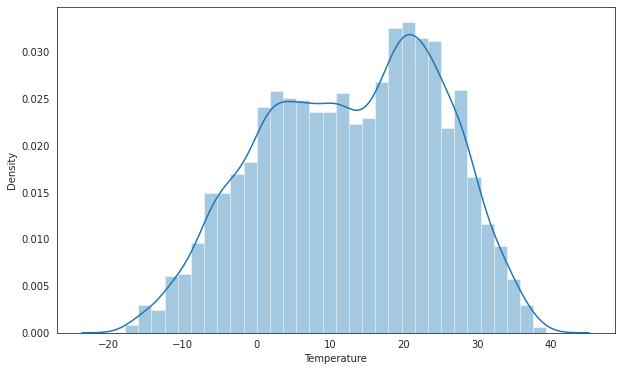

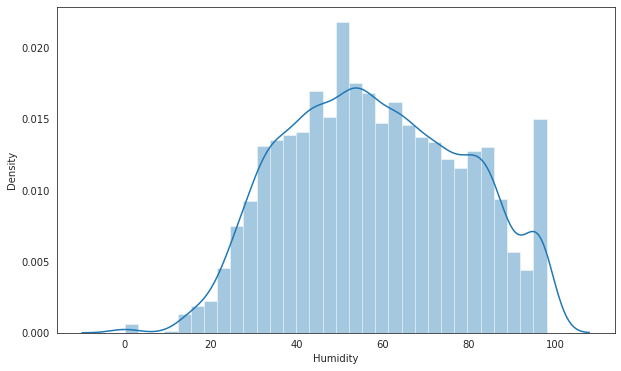

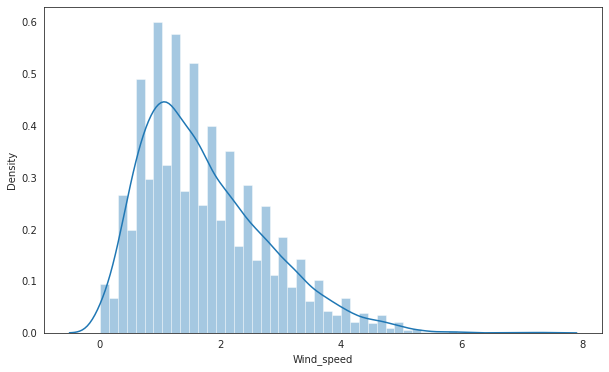

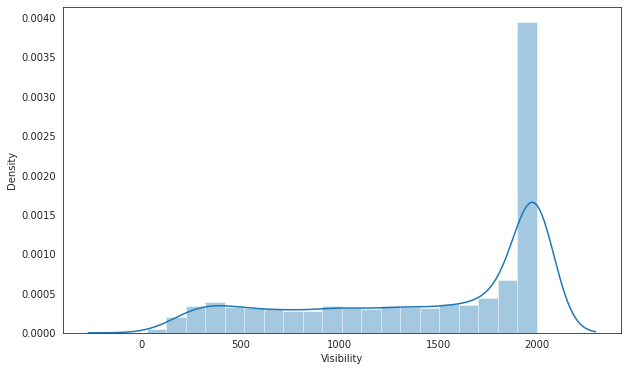

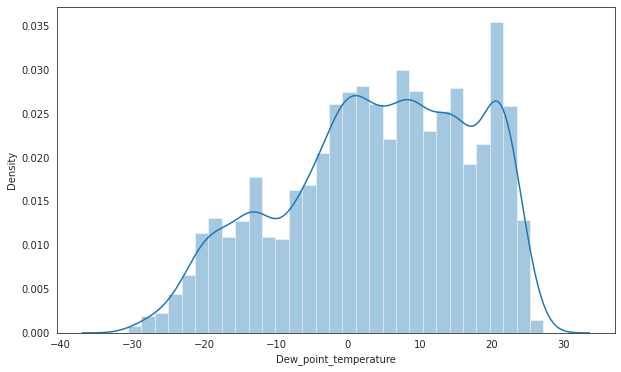

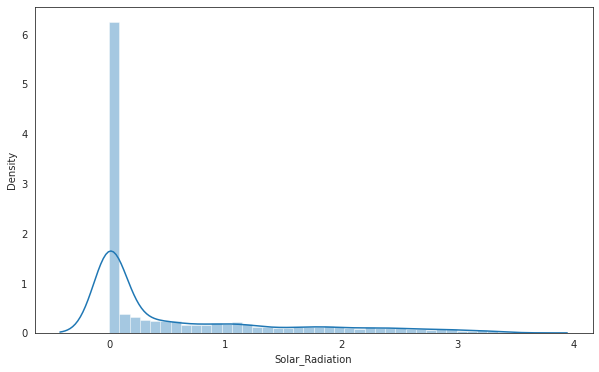

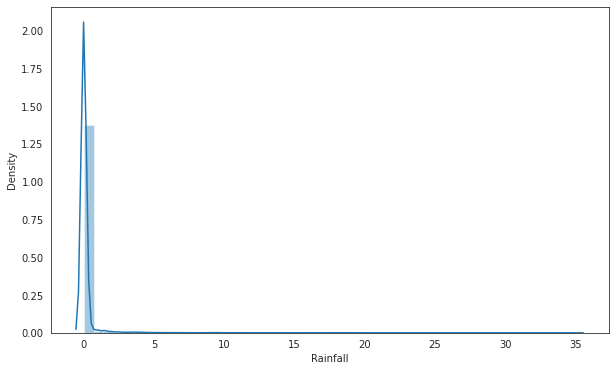

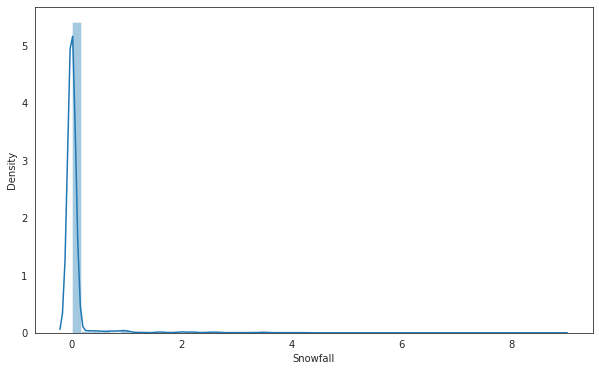

In [105]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#### Numerical vs.Rented_Bike_Count

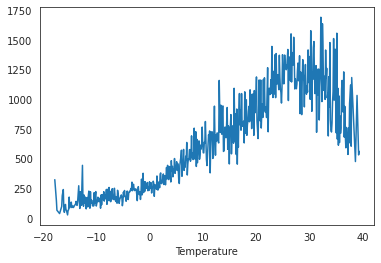

In [106]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

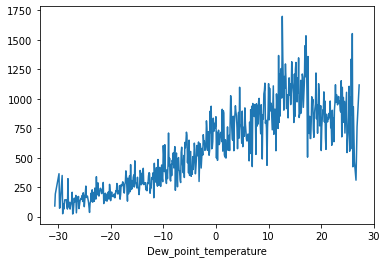

In [57]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* ***From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

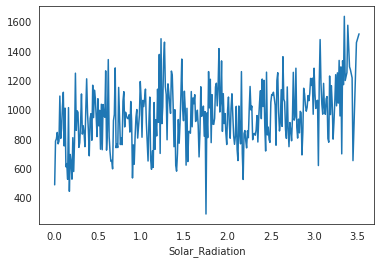

In [107]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()


* ***from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000***

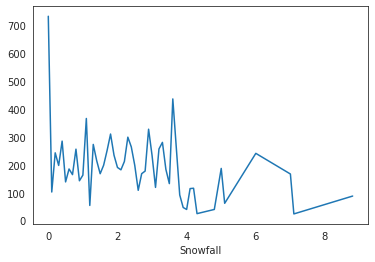

In [108]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower***

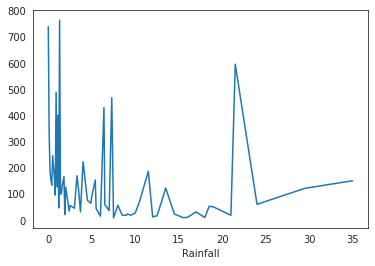

In [109]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

* ***We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

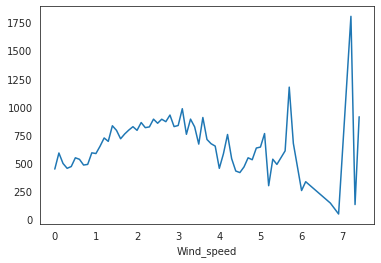

In [110]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

* ***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

####Regression plot

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

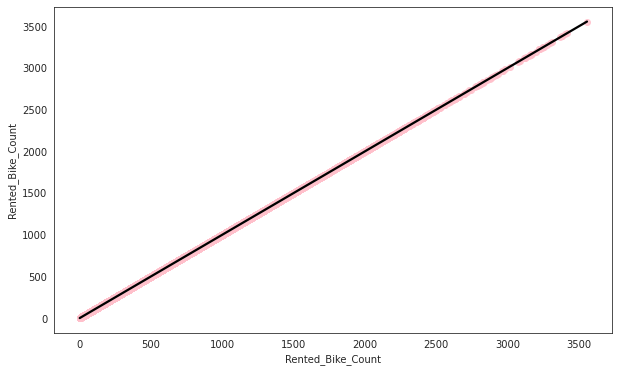

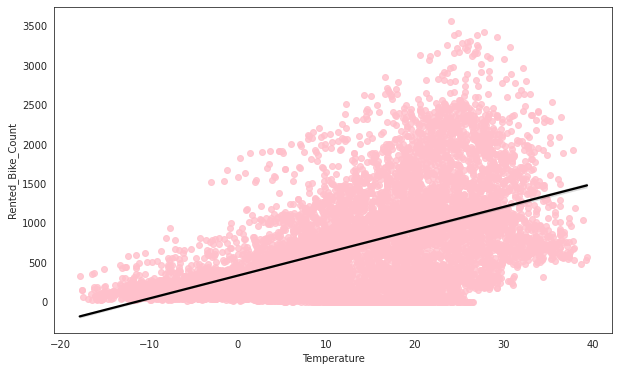

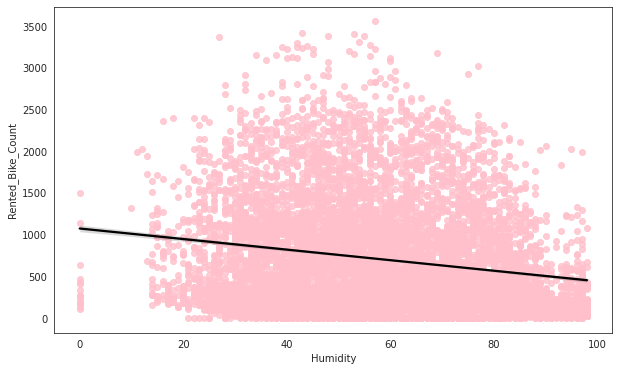

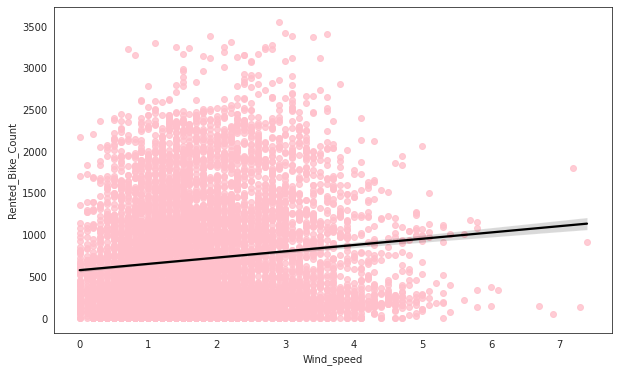

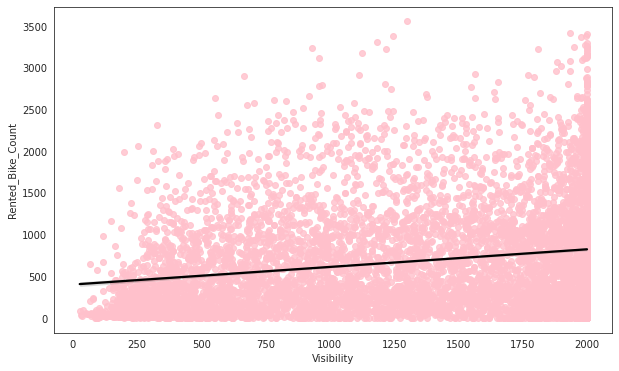

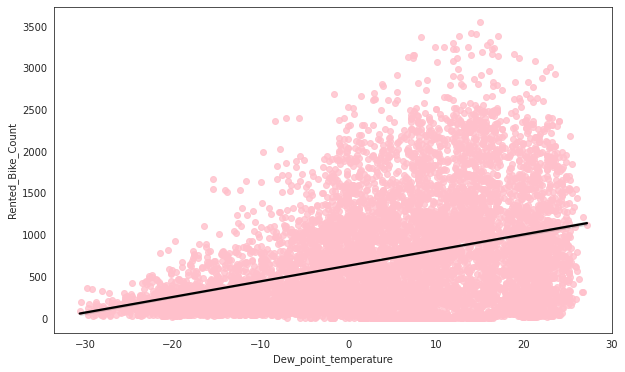

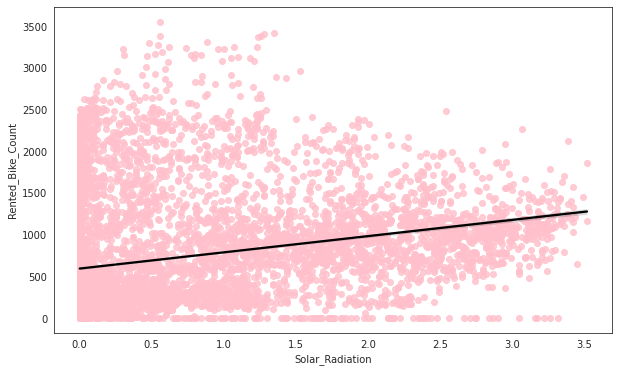

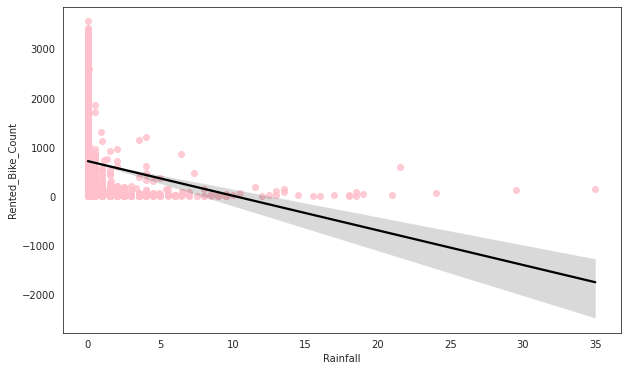

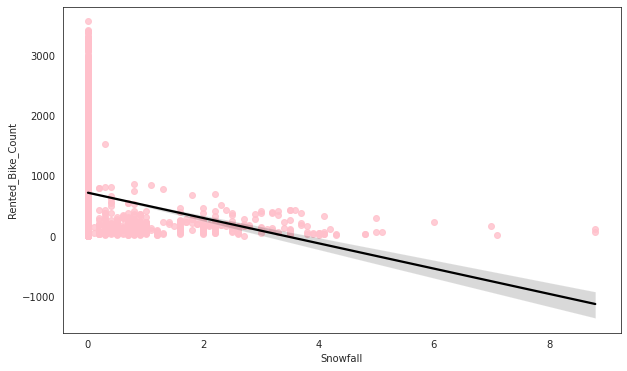

In [113]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'pink'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

##**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

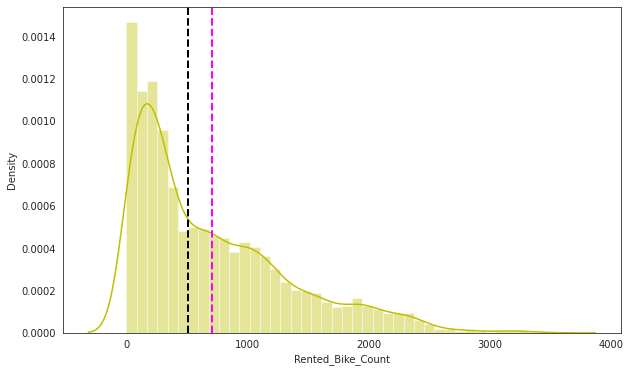

In [114]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

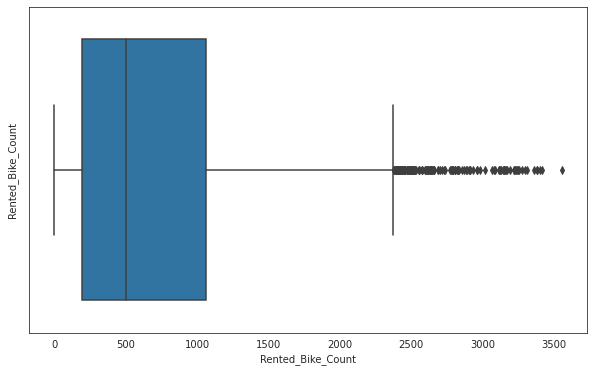

In [115]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

* ***The above boxplot shows that we have detect outliers in Rented Bike Count column***

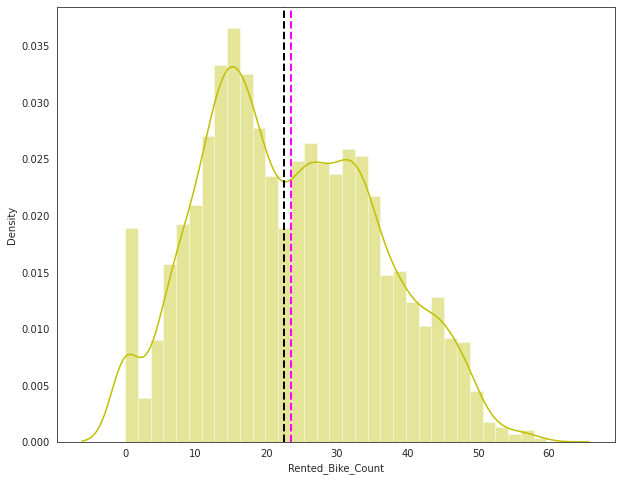

In [116]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

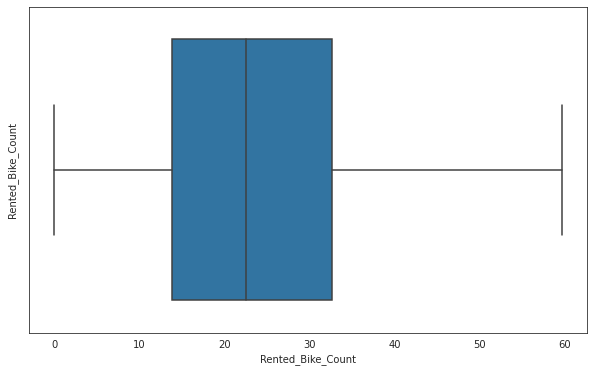

In [117]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

In [118]:
bike_df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [119]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
